# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
temp_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
Rows = temp_soup.find_all('tr', class_='data-row')
Rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [7]:
type(Rows)

bs4.element.ResultSet

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
header = temp_soup.find('tr')

In [9]:
type(header)

bs4.element.Tag

In [9]:
#extract all the headers
title =[]
for heading in header:
    value = heading.text.strip()
    title.append(value)
    #to remove blanks
    rm_blank = filter(None, title)
    f_title = list(rm_blank)
print(f_title)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [12]:
import collections as co

In [13]:
#creating dataframe using ordered dictionary method
#Extracting all the values and creating an ordered dictionary to create a dataframe with the extracted headers and values
mars_temp = []
od_mars_temp = []

for row in Rows:
    columns = row.find_all('td') # the first row is returning <th> tags, but since you queried <td> tags, it's returning empty list.
    if len(columns)>0: #In order to skip first row or in general, empty rows, you need to put an if check.
        #Use the indices properly to get different values.
        id_ = columns[0].get_text()
        terrestrial_date =columns[1].get_text()
        sol = columns[2].get_text()
        ls =  columns[3].get_text()
        month = columns[4].get_text()
        min_temp = columns[5].get_text()
        pressure = columns[6].get_text()
        mars_temp.append([id_,terrestrial_date,sol,ls,month,min_temp,pressure])
        od = co.OrderedDict(zip(f_title,([id_,terrestrial_date,sol,ls,month,min_temp,pressure])))
        od_mars_temp.append(od)

In [14]:
mars_temp_DF = pd.DataFrame(od_mars_temp)
mars_temp_DF

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
#creating dataframe by collating all the lists together
#Extracting each value in a list and creating a dataframe by collating all the lists together
id_ = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

for row in Rows:
    columns = row.find_all('td') # the first row is returning <th> tags, but since you queried <td> tags, it's returning empty list.
    if len(columns)>0: #In order to skip first row or in general, empty rows, you need to put an if check.
        #Use the indices properly to get different values.
        id_val = columns[0].get_text()
        id_.append(id_val)
        terrestrial_date_val =columns[1].get_text()
        terrestrial_date.append(terrestrial_date_val)
        sol_val = columns[2].get_text()
        sol.append(sol_val)
        ls_val =  columns[3].get_text()
        ls.append(ls_val)
        month_val = columns[4].get_text()
        month.append(month_val)
        min_temp_val = columns[5].get_text()
        min_temp.append(min_temp_val)
        pressure_val = columns[6].get_text()
        pressure.append(pressure_val)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_df = pd.DataFrame({'id': id_,
                        'terrestrial_date' : terrestrial_date,
                        'sol': sol,
                        'ls' : ls,
                        'month' : month,
                        'min_temp' : min_temp,
                        'pressure' : pressure})
# Confirm DataFrame was created successfully
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
#df.astype({'col1': 'int32'}).dtypes
#df["InsertedDate"] = df["InsertedDate"].astype('datetime64[ns]')
temp_df = temp_df.astype({'terrestrial_date': 'datetime64[ns]',
               'sol' : 'int64',
               'ls' : 'int64',
               'month' : 'int64',
               'min_temp' : 'float64',
               'pressure' : 'float64'})

In [16]:
# Confirm type changes were successful by examining data types again
temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
tot_months = temp_df['month'].value_counts().sort_index()
tot_months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [18]:
# 2. How many Martian days' worth of data are there?
Martian_days  = temp_df['terrestrial_date'].nunique()

In [20]:
# 3. What is the average low temperature by month?
avg_temp_month = temp_df.groupby(['month'], as_index = False)['min_temp'].mean().rename({'min_temp': 'avg_min_temp'}, axis=1)
avg_temp_month

,month,avg_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


<Axes: title={'center': 'Average Minimum temperature by Month'}, xlabel='Months', ylabel='Temperature in Celcius'>

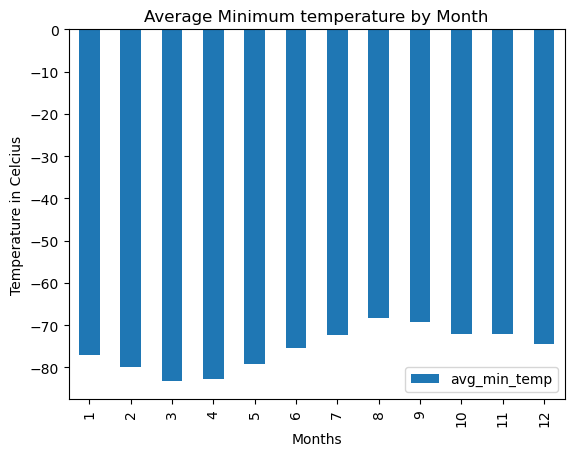

In [21]:
# Plot the average temperature by month
graph1 = avg_temp_month.plot.bar(x = 'month', y = 'avg_min_temp', title="Average Minimum temperature by Month")
plt.xlabel('Months')
plt.ylabel('Temperature in Celcius')
graph1

<Axes: title={'center': 'Average Minimum temperature by Month'}, xlabel='Months', ylabel='Temperature in Celcius'>

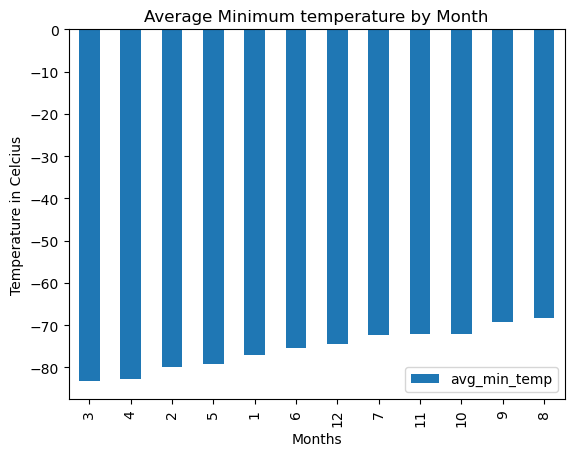

In [22]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_month_sorted= avg_temp_month.sort_values(by = 'avg_min_temp')
avg_temp_month_sorted
graph2 = avg_temp_month_sorted.plot.bar(x = 'month', y = 'avg_min_temp', title="Average Minimum temperature by Month")
plt.xlabel('Months')
plt.ylabel('Temperature in Celcius')
graph2

In [23]:
# 4. Average pressure by Martian month
avg_pressure_month = temp_df.groupby(['month'], as_index = False)['pressure'].mean().rename({'pressure': 'avg_pressure'}, axis=1)
avg_pressure_month

,month,avg_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [24]:
avg_pressure_sorted= avg_pressure_month.sort_values(by = 'avg_pressure')
avg_pressure_sorted

,month,avg_pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


<Axes: title={'center': 'Average Pressure by Month'}, xlabel='Months', ylabel='Atmospheric Pressure'>

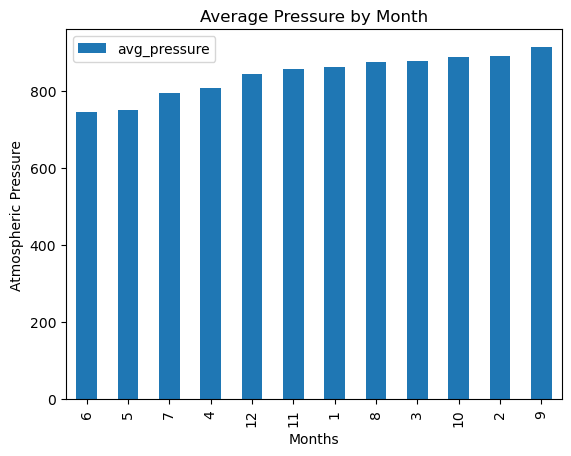

In [25]:
# Plot the average pressure by month
graph3 = avg_pressure_sorted.plot.bar(x = 'month', y = 'avg_pressure', title="Average Pressure by Month")
plt.xlabel('Months')
plt.ylabel('Atmospheric Pressure')
graph3

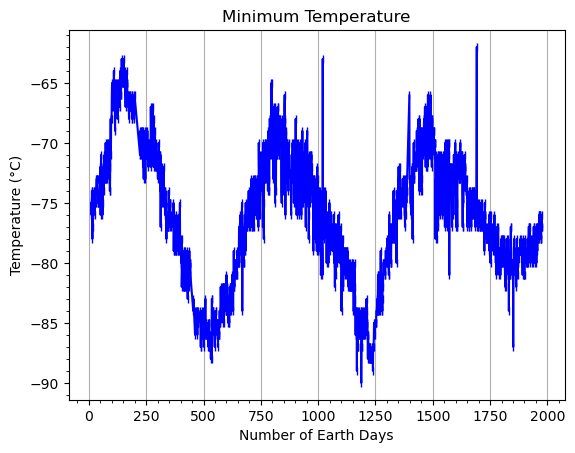

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?
graph4 = plt.plot(temp_df['sol'], temp_df['min_temp'], color='blue', marker='|', linestyle='solid')
plt.title("Minimum Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature (°C)")
plt.grid(True, axis='x')
plt.minorticks_on()
graph4

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
temp_df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")


In [28]:
browser.quit()